Introducton to the Use of Classes in Python\
Robert Palmere, 2021\
Email: rdp135@chem.rutgers.edu

### Classes in Python
1. Properties and Functions of a Class
2. Inheritance (polymorphism)
3. Encapsulation (public vs. private variables)
4. Decorators
5. Overview of Python Special Methods ("dunder" methods)
6. Basic Applications and Examples

What is a class?

"An extensible program-code-template for creating objects, providing initial values for state (member variables) and implementations of behavior (member functions)." 

Bruce 2002, 2.1 Objects, classes, and object types, https://books.google.com/books?id=9NGWq3K1RwUC&pg=PA18.

#### Properties and Functions of a Class

The Python data model allows for "duck typing": methods can be placed as needed within the object for it to behave as desired rather than inherit from some base class / interface.

Let's create a class using the 'class' keyword.

In [2]:
class Rectangle:
    pass

We have defined a class 'Rectangle'. What's inside by default?

In [3]:
print(dir(Rectangle))

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']


These are what are known as "double underscore", "dunder", or "special" methods in Python.

These are built-in functions often used for operation overloading (we'll get to this later).

To understand where these methods come from we should understand that classes *inherit* from a built-in type called 'object'.

#### **Inheritance**

Classes are great for when we want to describe a complex category (object) which holds various attributes and behaviors.

As a feature of classes, inheritance has several benefits:

1. Reuse - Don't need to rewrite code present in the "base" or "super" class.
2. Encapsulation - Prevent access to class specific attributes
3. Extensibility - Can extend the features of the "base" or "super" class.
4. Operation Overloading - Change the meaning of the operands based on modifying class methods

In [5]:
class NewRectangle(object): # Syntax for inheritance () after class name
    pass

Although not explicitly stated, both class 'Rectangle' and 'NewRectangle' inherit this built-in type.

In [6]:
print(Rectangle.__bases__)
print(NewRectangle.__bases__)

(<class 'object'>,)
(<class 'object'>,)


We did not define __new__ nor __init__ for our class but they were able to be called to generate the class from 'object' which is a built-in type.

In [7]:
Rectangle.__new__ is object.__new__

True

We see that __new__ is an attribute of the base class 'object' and is accessed via inheritance. These are the same. 'Object' is highlighted in green as it is a built-in type.

Here the 'is' keyword is used to identify that the two hold the same location in memory (CPython interpeter).

#### **Attributes**

There are two types of attributes a class can have:

1. Class attributes - shared by all objects of the class
2. Instance attributes - specific to a particular instance of a class (not shared)

In [8]:
# 1. An example of class attributes

class Rectangle:
    x = 1
    y = 0
    
rect1 = Rectangle() # Instantiate the object "rect1"
rect2 = Rectangle() # Instantiate the object "rect2"

print(rect1.x) # "." operator to access class attribute
print(rect2.x)

1
1


Since these are *class* attributes, once we change it for one instance, it will change it for all instances.

In [9]:
Rectangle.x = 2 # Change the class attribute "x" to be 2

print(rect1.x)
print(rect2.x)

2
2


Notice that I changed Rectangle.x not Rectangle().x. This applied changes to all class instances.

If I tried to change the "x" class attribute from an *instance*, it would only be local to that instance of the class as shown in the following example.

In [ ]:
rect1.x = 0

print(rect1.x)
print(rect2.x) # Does not change

In [10]:
# 2. An example of instance attributes

class Rectangle(object):
    def __init__(self): # define the __init__() special method to initiate "x" and "y" attributes upon instantiation
        self.x = 1 # the function takes in "self" keyword argument which is the class object itself and defines these attributes
        self.y = 1
        
rect1 = Rectangle() # Instantiate the object "rect1"
rect2 = Rectangle() # Instantiate the object "rect2"

print(rect1.x)
print(rect2.x)

1
1


In the case of the instance attributes, the special method __ init __() is required to tell the class what to do upon instantiation ("()").

Had we not done this we would not be able to access these variables outside of their respective instances.

In [11]:
print(Rectangle().x) # Gives error

AttributeError: type object 'Rectangle' has no attribute 'x'

We can think of the __ init __ () special method as the *initializer* of our class. It initializes new instance attributes.

__ init __ () accepts argument (self) which is actually passed to it by __ new __ (). Let's take a look at this example:

In [12]:
class Rectangle(object):
    
    def __new__(cls): # Constructor
        print('Class object from __new__ : {}'.format(cls))
        
    def __init__(self): # Initializer
        print('Class object from __init__: {}'.format(self))
        
Rectangle(); # Only prints once from __new__ ()

Class object from __new__ : <class '__main__.Rectangle'>


We usually do not have to worry about the __ new __ () special method because it is automatically called by __ init __ () every time we instantiate a class object.

__ new __ () returns the newly generated class to __ init __ () as 'self' so we can initialize new attributes to it.

In [ ]:
class Rectangle(object):
    
    def __init__(self):
        print('Class object from __init__: {}'.format(self))
        
Rectangle();

**So why wasn't __ init __ () called in the first case?**

**Answer: We did not specify the return that would be automatically passed to __ init __ () as 'self' we only told __ new __ () to print the the class ('cls').**

In [ ]:
class Rectangle(object):
    
    def __new__(cls):
        print("Object being passed to __init__() as 'self' : {}".format(cls))
        return object.__new__(cls) # <--- ** return a new class called 'Rectangle' as an object to __init__
    
    def __init__(self):
        print('Initialized!')
        
Rectangle();

We can also do this using the super() method of Python which returns the base class by default.

In [ ]:
class Rectangle(object):
    
    def __new__(cls):
        return super().__new__(cls)
    
    def __init__(self):
        print('Initialized!')
        
Rectangle(); # ';' to halt Jupyter output

This is equilivalent to:

In [13]:
class Rectangle(object):
    
    def __new__(cls):
        return super(Rectangle, cls).__new__(cls)
    
    def __init__(self):
        print('Initialized!')
        
Rectangle();

Initialized!


In [14]:
print(super.__doc__) # Documentation helps a bit

super() -> same as super(__class__, <first argument>)
super(type) -> unbound super object
super(type, obj) -> bound super object; requires isinstance(obj, type)
super(type, type2) -> bound super object; requires issubclass(type2, type)
Typical use to call a cooperative superclass method:
class C(B):
    def meth(self, arg):
        super().meth(arg)
This works for class methods too:
class C(B):
    @classmethod
    def cmeth(cls, arg):
        super().cmeth(arg)



It might appear that super() is just a fancy way of getting the base class. However, it is more useful than this.

Super() is actually Python's way of handling multiple inheritance by enabling the derived class (the class doing the inheriting) the ability to correctly identify the order of inherited classes according to the Method Resolution Order (MRO).

More reading on this can be done on [stackoverflow](https://stackoverflow.com/questions/576169/understanding-python-super-with-init-methods).

In [15]:
print(Rectangle.__mro__.__doc__) # The MRO is actually a built-in attribute we can access

Built-in immutable sequence.

If no argument is given, the constructor returns an empty tuple.
If iterable is specified the tuple is initialized from iterable's items.

If the argument is a tuple, the return value is the same object.


In [16]:
print(Rectangle.__mro__)

(<class '__main__.Rectangle'>, <class 'object'>)


We can think of this as the order in which the derived and base classes are "resolved":

In [17]:
def print_mro_order(class_):
    for i in range(len(class_.__mro__)):
        print(i+1, class_.__mro__[len(class_.__mro__) - 1 - i])
        
print_mro_order(Rectangle)

1 <class 'object'>
2 <class '__main__.Rectangle'>


In [18]:
class A(object): x = 'a'

class B(A): pass

class C(A): x = 'c'

class D(B, C): pass

print(D.x)

c


We overide the 'x' attribute of class A after inheriting in C and D which inherits C correctly displays this change.

Displaying the MRO of class D will show why this order occurs:

In [19]:
print_mro_order(D) # Class attributes defined through this series of inheritance

1 <class 'object'>
2 <class '__main__.A'>
3 <class '__main__.C'>
4 <class '__main__.B'>
5 <class '__main__.D'>


#### Encapsulation

Python classes have the ability to hide attributes although not as extensively as C++ (no 'protected' or 'friend' labels).

In [20]:
class Rectangle(object):
    
    def __init__(self):
        self.__x = 20

print(Rectangle().__x) # <--- double underscore makes this inaccesible the dot operator

AttributeError: 'Rectangle' object has no attribute '__x'

In [21]:
print(Rectangle.__dict__) # __dict__ stores all class writable attributes

{'__module__': '__main__', '__init__': <function Rectangle.__init__ at 0x10c25c790>, '__dict__': <attribute '__dict__' of 'Rectangle' objects>, '__weakref__': <attribute '__weakref__' of 'Rectangle' objects>, '__doc__': None}


In [22]:
print(Rectangle()._Rectangle__x) # Note that the compiler renamed our 'private' attribute so that it is hidden

20


There are no *truly* private or methods of encapsulation but the '_ _' can be used to prevent direct access and the '_' can signal to other developers to beware.

In [23]:
class Car(object):
    
    def __init__(self):
        self.__speed = 0 # 'Private instance attribute'
        
    def get_speed(self): # 'Getter method'
        return self.__speed
    
    def set_speed(self, speed): # 'Setter method'
        self.__speed = speed
        return 

car = Car()

print(car.get_speed()) # Accessed via a 'getter' method

0


Since the attribute is 'private' we must use 'getter' and 'setter' method to retrieve and replace the attribute value.

We can also do this with public instance attributes.

In [24]:
class Car(object):
    
    def __init__(self):
        self.speed = 0
        
    def get_speed(self):
        return self.speed
    
    def set_speed(self, speed):
        self.speed = speed
        return 

car = Car()

print(car.get_speed()) # Accessed via a 'getter' method

0


The benefit here is that we are setting a level of protection for the instance attribute as well as added clarity for the class (i.e. Car.s = 1 may not be as clear as Car.set_speed(1) ).

In the following example we will see that we can add 'protection' to our class instance attribute by only enabling positive values to speed of our car.

In [25]:
class Car(object):
    
    def __init__(self):
        self.speed = 0 
        
    def get_speed(self):
        return self.speed
    
    def set_speed(self, speed):
        try:
            self.speed = float(speed)
            return self.speed
        except:
            raise ValueError('Speed must be a numeric value.')

car = Car()

print(car.get_speed()) # Speed before setting

car.set_speed('some string') # Argument is a string so error is raised.

0


ValueError: Speed must be a numeric value.

In [26]:
car.set_speed(100); # We set the speed to a numeric value

print(car.get_speed()) # Speed instance attribute of 'car' now set to 100

100.0


Notice that we are using print(car.get_speed()). If we want to change what attributes are shown by print() we can change the return of __ str __ ().

In [27]:
class Car(object):
    
    def __init__(self):
        self.speed = 0 # 'Private instance attribute'
        
    def get_speed(self):
        return self.speed
    
    def set_speed(self, speed):
        try:
            self.speed = float(speed)
            return self.speed
        except:
            raise ValueError('Speed must be a numeric value.')
            
    def __str__(self):
        return f'Speed: {self.speed}' # return a formatted string literal

car = Car()

print(car) # Now when we print car we are presented with the speed.

Speed: 0


There is a more Pythonic way of making these setters and getters within our class with the use of a *decorator*. 

A decorator is the cherry on top of our Python syntax. We can specify a decorator above a function to indicate that that function is an argument of the decorator.

First, let's see how the setter and getters can be used with the @property decorator and then we will break down the code of this decorator and the general functions of decorators.

In [29]:
class Car(object):
    
    def __init__(self):
        self._speed = 0 # Notice we changed 'speed' to '_speed' so it doesn't conflict with the property function
    
    @property
    def speed(self):
        return self._speed
        
    @speed.setter
    def speed(self, speed):
        try:
            self._speed = float(speed)
        except:
            raise ValueError('Speed must be a numeric value.')
            
    def __str__(self):
        return f'Speed: {self._speed}'
    
car = Car()

print(car.speed) # the function speed() acts as an instance attribute of the class

0


Since speed() is now decorated with @property we can now use the same name for the setter and getter of these methods.

In [30]:
car.speed = 'some string' # speed cannot be set to anything but a numeric value without an error

ValueError: Speed must be a numeric value.

In [31]:
car.speed = 100

In [32]:
print(car.speed)

100.0


We have added clarity while still protecting and adding functionality that we wanted for our getter and setter for this particular instance attribute.

#### Decorators

We can see the benefit of using decorators. Let's write out own simple decorators to demonstrate their inner workings.

Decorators can either be:
    
    1. Functions
    2. Classes
    
The @property decorator is a class.

In [33]:
print(property)
print(property.__doc__)

<class 'property'>
Property attribute.

  fget
    function to be used for getting an attribute value
  fset
    function to be used for setting an attribute value
  fdel
    function to be used for del'ing an attribute
  doc
    docstring

Typical use is to define a managed attribute x:

class C(object):
    def getx(self): return self._x
    def setx(self, value): self._x = value
    def delx(self): del self._x
    x = property(getx, setx, delx, "I'm the 'x' property.")

Decorators make defining new properties or modifying existing ones easy:

class C(object):
    @property
    def x(self):
        "I am the 'x' property."
        return self._x
    @x.setter
    def x(self, value):
        self._x = value
    @x.deleter
    def x(self):
        del self._x


Decorators take in functions as arguments, modify the return of that function, and return the modified result of the nested function.

An example of a *Function* decorator:

In [34]:
def make_string(str_):
    '''Define a function which returns the string we give'''
    return str_

string = make_string('Hello World!')

print(string)

Hello World!


In [35]:
def formatted(func):
    '''Define a decorator to format string outputs'''
    def inner(func):
        return '*** ' + func + ' ***'
    return inner # return nested function which modifies output of the given function

In [36]:
@formatted
def make_string(str_):
    '''Define a function which returns the string we give'''
    return str_

string = make_string('Hello World!')

print(string)

*** Hello World! ***


What if we didn't have the nested function 'inner'?

In [ ]:
def formatted(func):
    return '*** ' + func + ' ***'

@formatted
def make_string(str_):
    '''Define a function which returns the string we give'''
    return str_

string = make_string('Hello World!')

print(string) # Error as 'func' given to 'formatted' is a function not a string

We don't know what argument will be passesd to 'func'. Additionally this is not valid syntax, so it doesn't suffice to do:

In [37]:
def formatted(func(str_)): # <-- syntax error
    return '*** ' + func(str_) + ' ***'

@formatted
def make_string(str_):
    '''Define a function which returns the string we give'''
    return str_

string = make_string('Hello World!')

print(string)

SyntaxError: invalid syntax (1953981529.py, line 1)

This is why our nested function 'inner' is required. This nested function is also known as a *wrapper* function. It wraps around the argument function and can access the outer local functions.

The @formatted syntax is just short for:

In [38]:
def make_string(str_):
    '''Define a function which returns the string we give'''
    return str_

string = formatted(make_string('Hello World!'))
print(string)

<function formatted.<locals>.inner at 0x10c275550>


How can we do this with a class as a decorator?

In the case of a class we need to use the __ call __ () special method for the function to be passed as an argument to the decorator class. 

Let's see what the __ call __ () special method does.

In [39]:
class Formatter(object):
    
    def __init__(self):
        self.string = 'Hello World!'
        
    def __call__(self, *args):
        for i in args:
            print(f'You called {self.__class__} with arguments: {i}!', end=' ')
        return list(args)

In [40]:
F = Formatter();
F('Argument'); # <-- Can call the class instance for the desired behavior

You called <class '__main__.Formatter'> with arguments: Argument! 

This is the same thing as:

In [41]:
F.__call__('Arugment');

You called <class '__main__.Formatter'> with arguments: Arugment! 

Instead of generating an instance and then calling the instance, we can do this directly by adding arguments to the __ init __ () method of the class. i.e.

In [42]:
class Formatter(object):
    
    def __init__(self, *function):
        self.f = function
        
    def __call__(self):
        for i in self.f:
            print(f'You called {self.__class__} with arguments: {i}!', end=' ')
        return self.f

In [43]:
Formatter('Argument')();

You called <class '__main__.Formatter'> with arguments: Argument! 

This is a bit awkward but leads into how a class decorator is implemented as we want:

formatted = Formatter(make_string(str_)) 

with the 'formatted' class instance to be the formatted string.

We want __ call __ () to act as the wrapper function, making alterations to the function argument before returning. We can see this done in the following example:

In [44]:
class Formatter(object):

    def __call__(self, f):
        def inner(f):
            return '*** ' + f + ' ***'
        return inner
    
@Formatter()
def make_string(str_):
    '''Define a function which returns the string we give'''
    return str_

print(make_string('Hello World!'))

*** Hello World! ***


#### Practical Implementations

a.) Plotting an object

In [45]:
import numpy as np
import matplotlib.pyplot as plt

class Rectangle:
    
    def __init__(self, x=0, y=0):
        self.x = x
        self.y = y
        
    def __repr__(self):
        return 'Rectangle(%r, %r)' % (self.x, self.y)
    
    def __str__(self):
        return f'{self.x} x {self.y} Rectangle'
    
    def __abs__(self):
        return np.hypot(self.x, self.y)
    
    def __add__(self, other):
        x, y = self.x + other.x, self.y + other.y
        return Rectangle(x, y)

    def __mul__(self, other):
        return Rectangle(self.x * other.x, self.y * other.y)
    
    def plot(self, ax=None):
        if ax == None:
            fig, ax = plt.subplots()
        ax.plot([i for i in range(self.x+1)], [0 for i in range(self.x+1)], 'k')
        ax.plot([i for i in range(self.x+1)], [self.y for i in range(self.x+1)], 'k')
        ax.plot([0 for i in range(self.y+1)], [i for i in range(self.y+1)], 'k')
        ax.plot([self.x for i in range(self.y+1)], [i for i in range(self.y+1)], 'k')
        return ax

In [46]:
r1 = Rectangle(2, 2)
r2 = Rectangle(3, 4)

print(r1)
print(r2)

2 x 2 Rectangle
3 x 4 Rectangle


In [47]:
abs(r1)

2.8284271247461903

In [48]:
r3 = r1 + r2
print(r3)

5 x 6 Rectangle


In [49]:
r3 = r1 * r2
print(r3)

6 x 8 Rectangle


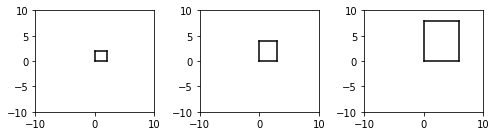

In [50]:
rectangles = [r1, r2, r3]
fig, axs = plt.subplots(1, len(rectangles), figsize=(7, 2))
for i in range(len(rectangles)):
    rectangles[i].plot(ax=axs[i])
    axs[i].set_xlim([-10, 10])
    axs[i].set_ylim([-10, 10])
plt.tight_layout()
plt.show()

We can expand this class to describe other objects but because of inheritance we don't have to rewrite the above code.

In [51]:
class Square(Rectangle):
    
    def __init__(self, x=0, y=0):
        Rectangle.__init__(self) # <-- initialize the base class (we can also use super())

In [52]:
s1 = Square(1, 2)
print(s1)

0 x 0 Rectangle


A square is a special type of Rectangle. We see that the Square is behaving as if it is a Rectangle after inheriting from Rectangle.

Let's change this in Square so that x must equal y and it is accurately represented by print().

In [54]:
class Square(Rectangle):
    
    def __init__(self, x=0, y=0):
        Rectangle.__init__(self)
        self.x = x
        self.y = y
        if self.x != self.y:
            raise ValueError('Sides of square must be equal.')
        
    def __str__(self): # <-- override base class __str__ () method
        return 'Square(%r, %r)' % (self.x, self.y)
    
    # Other methods already written!

In [55]:
s1 = Square(1, 0)
print(s1)

ValueError: Sides of square must be equal.

In [56]:
s1 = Square(2, 2)
print(s1)

Square(2, 2)


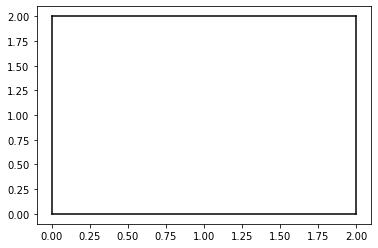

In [57]:
s1.plot();

b.) Generating Data for Fitting

includes:

* __ iter __ ()
* __ next __ ()

In [59]:
class Exp(object):
    '''Class to define an exponentially increasing function'''
    
    def __init__(self, n):
        self.n = n
        self.i = 0
        
    def __iter__(self):
        return self
    
    def __next__(self):
        if self.i >= self.n:
            raise StopIteration
        self.i += 1
        return self.i**2

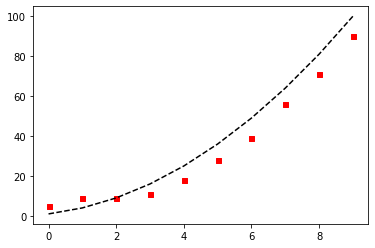

In [60]:
import matplotlib.pyplot as plt
import numpy as np

made_up_data = [i**2+np.random.randint(10) for i in range(10)]
plt.plot([i for i in Exp(10)], '--k')
plt.scatter([i for i in range(len(made_up_data))], made_up_data, s=5**2, color='r', marker='s')

There is much more to Python classes then is presented here but this should get you started.

Next step: Generate your own classes with unique properties suited for a specific set of tasks. Think about how you want the class to behave (design) and then work out how to organize your class and decide which special methods you'll need.

Other Python special methods, built-in decorators, and modules to think about:

1. @property (decorator)
2. @classmethod (decorator)
3. @staticmethod (decorator)
4. __ dict __ () (special method)
5. clockdeco.clock (decorator)
6. functools.wraps (wrapper)
7. __ del __ ()
8. __ exit __ ()
9. __ enter __ ()
10. __ set __ and __ get __ ()\
And many more

In [69]:
class NaCl:
    def __init__(self, a):
        self.a = a**2 # Complicated function
        self.spin = 0
        
    def spinf(self):
        self.spin += 5
        self.spin -= 1
        self.spin =/ 10
        return self.spin

na = NaCl(0)
na.spinf()
spin = na.spin

print(spin)

SyntaxError: invalid syntax (4016561915.py, line 9)